<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Galaxy multiWaveLength <br><br><br>Analysis using numpy</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Data Source: https://asd.gsfc.nasa.gov</p>



Loading the libraries we need

In [1]:
%matplotlib inline
import numpy as np
import imageio
from skimage import color
import matplotlib.pyplot as plt
import copy
from skimage.color import rgb2gray
from PIL import Image

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Creating a numpy array from an image file:</p>
<p> load and display each picture from difference wavelength (GammaRay, Xray, Infrared, radio) find the shape of the array, explain each dimension</p>
<p>Sample of output:</p>
<p>(320, 5760, 3)</p>
<img src="./pict/xRayGRB.png" align="left" />

(320, 5760, 3)


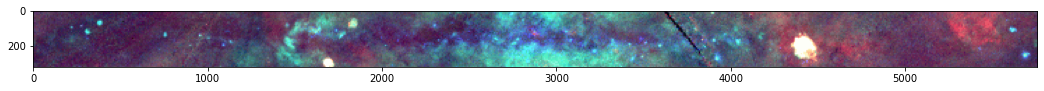

In [8]:
photo_xRay = imageio.imread('./multiwavelength/Xray.jpg')
fig, ax=plt.subplots(figsize=(18, 4))
ax.imshow(photo_xRay , cmap='gray')
print(photo_xRay.shape)


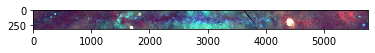

In [6]:
plt.imshow(photo_xRay)
plt.show()

<p>As we have 3 dimensions (RGB)and RGB does not add information, merge all 3 dimensions in a single one using grey scale image using the function rgb2gray </p>
<p>Sample of output:</p>
<p>(320, 5760)</p>
<img src="./pict/XRayGray.png" align="left" />

(320, 5760)


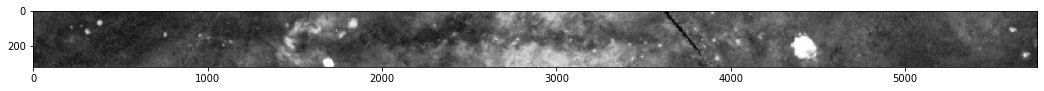

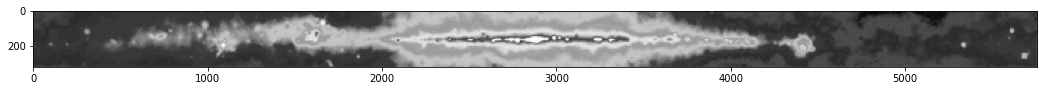

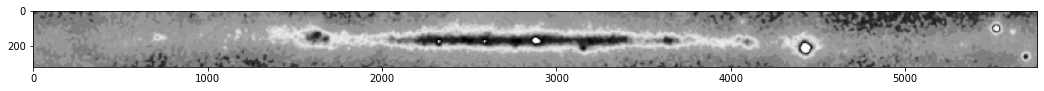

In [9]:
photo_xRay = imageio.imread('./multiwavelength/Xray.jpg')
photo_xRay_grey = color.rgb2gray(photo_xRay)
fig, axRay=plt.subplots(figsize=(18, 4))
axRay.imshow(photo_xRay_grey, cmap='gray')
print(photo_xRay_grey.shape)


photo_radio = imageio.imread('./multiwavelength/Radio.jpg')
photo_radio_grey = color.rgb2gray(photo_radio)
fig, axRadio=plt.subplots(figsize=(18, 4))
axRadio.imshow(photo_radio_grey, cmap='gray')

photo_gammaRay = imageio.imread('./multiwavelength/GammaRay.jpg')
photo_gammaRay_grey = color.rgb2gray(photo_gammaRay)
fig, axGamma=plt.subplots(figsize=(18, 4))
axGamma.imshow(photo_gammaRay_grey, cmap='gray')


<p>Merge all 3 waveLength in a single rgb image. Define to which color are linked XRay, Radio and Gamma waveLength</p>
<p>Sample of output:</p>
<img src="./pict/AllBandGRB.png" align="left" />

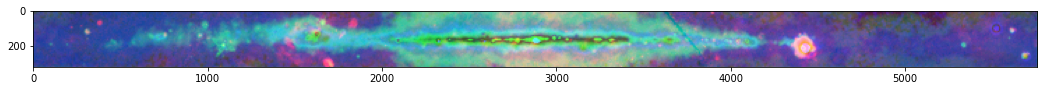

In [32]:
photo_all_band=copy.deepcopy(photo_xRay)

photo_all_band[:,:,0]=photo_xRay_grey*255
photo_all_band[:,:,1]=photo_radio_grey*255
photo_all_band[:,:,2]=photo_gammaRay_grey*255
fig, axAll=plt.subplots(figsize=(18, 4))
axAll.imshow(photo_all_band)

apply some cleaning to remove noise with value <150
<p>Sample of output:</p>

<img src="./pict/AllBandClean1.png" align="left" />

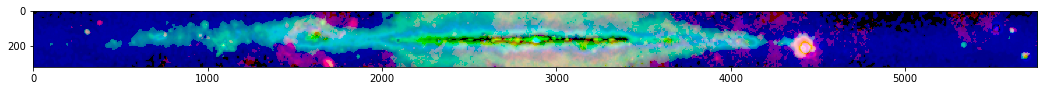

In [33]:
photo_all_band_cleaning_mask=photo_all_band<150
photo_all_band[photo_all_band_cleaning_mask]=0
fig, axFilter=plt.subplots(figsize=(18, 4))
axFilter.imshow(photo_all_band)

apply some cleaning to highlight part of the picture where XRay>220, Radio>150,  GammaRay>150
<p>Sample of output:</p>

<img src="./pict/AllBandClean2.png" align="left" />

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


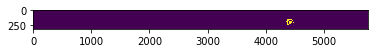

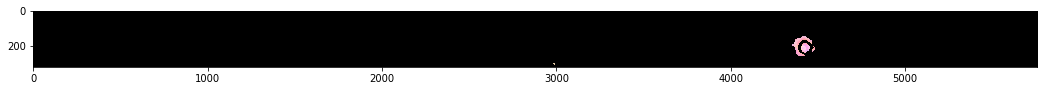

In [56]:
photo_all_band_highligt_mask=(photo_all_band[:,:,0]>220)&(photo_all_band[:,:,1]>150)&(photo_all_band[:,:,2]>150)
print(photo_all_band_highligt_mask)
#photo_all_band[photo_all_band_highligt_mask]=255
plt.imshow(photo_all_band_highligt_mask)
photo_all_band_cleaned=copy.deepcopy(photo_all_band)

photo_all_band_cleaned[np.logical_not(photo_all_band_highligt_mask)]=0
fig, axHighLight=plt.subplots(figsize=(18, 4))
axHighLight.imshow(photo_all_band_cleaned)

Only a single part of the picture should be highlighted. Try to find the center of his position using the following mask:

<img src="./pict/mask.png" align="left" style="width:550px;height:360px;"/>

X =  (320, 1)  and Y =  (1, 5760)


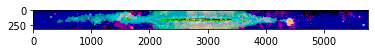

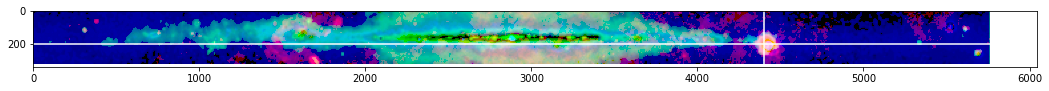

In [94]:
total_rows, total_cols, total_layers = photo_all_band.shape
#print("photo_data = ", photo_data.shape)
X, Y = np.ogrid[:total_rows, :total_cols]
fig = plt.figure()
print("X = ", X.shape, " and Y = ", Y.shape)

plt.imshow(photo_all_band)
plt.show()
summ=0

for colPotentialCenter in range(0,total_cols,100):
    for rowPotentialCenter in range (0,total_rows,100):
       

        #print("center_row = ", center_row, "AND center_col = ", center_col)

        dist_from_potential_center = (X - rowPotentialCenter)**2 + (Y - colPotentialCenter)**2
        #print(dist_from_center)
        radius = 1000
        #print("Radius = ", radius)
        circular_mask = (dist_from_potential_center > radius)
        #print(circular_mask[1500:1550,2000:2200])
       
        #photo_all_band_filtered[np.logical_not(circular_mask)] = 255
        if (photo_all_band[np.logical_not(circular_mask)].sum()>summ):
            summ=photo_all_band[np.logical_not(circular_mask)].sum()
            centerOfBurstrowID=rowPotentialCenter
            centerOfBurstcolID= colPotentialCenter
            plt.show()
            #print("center X = ", centerOfBurstrowID, " and center Y = ", centerOfBurstcolID)
       
        

fig, axCircular=plt.subplots(figsize=(18, 4))
axCircular.imshow(photo_all_band)
axCircular.vlines(centerOfBurstcolID,0,total_rows,colors='w')
axCircular.hlines(centerOfBurstrowID,0,total_cols,colors='w')